In [75]:
import requests
import pandas as pd 

In [76]:
#loading stock symbols into data frame
stock_symbols = pd.read_csv(r"/Users/samys/Desktop/xtra/PolyQuant/stock_list.csv")

#removing bad character
stock_symbols['Symbol'] = stock_symbols['Symbol'].str.replace('^', '')

#displaying shape 
display(stock_symbols.shape)

(5807, 1)

In [77]:
# defining size of chunk 
n = 100

#breaking dataframe into chunks 
symbols_chunk = [stock_symbols[i:i+n] for i in range(0,stock_symbols.shape[0],n)]

In [78]:
#grabbing example to see chunk 
example_chunk = list(symbols_chunk[0]['Symbol'])

#showing first five items
example_chunk[:5]

['A', 'AA', 'AABA', 'AAC', 'AAL']

In [79]:
# Load the CSV file
stock_df = pd.read_csv('/Users/samys/Desktop/xtra/PolyQuant/stock_data.csv')
# Transpose the DataFrame
transposed_df = stock_df.transpose()

# Reset the index to turn the original column names into a column
transposed_df.reset_index(inplace=True)

# Set the column names
transposed_df.columns = ['attribute'] + [f'stock_{i}' for i in range(1, len(transposed_df.columns))]

# Move the 'attribute' column to be the first column (it should already be, but just to be sure)
cols = transposed_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
transposed_df = transposed_df[cols]

# Display the first few rows of the transposed DataFrame
print(transposed_df.head())

# Save the transposed data to a new CSV file
transposed_df.to_csv('transposed_stock_data.csv', index=False)

  stock_5222           attribute  stock_1  stock_2   stock_3  stock_4  \
0        0.0                beta  1.21802  2.35784   0.85623  0.66686   
1        0.0   bookValuePerShare  2.79895      0.0  31.06079      0.0   
2    6.75984        currentRatio  1.31538  18.2033   3.46119  6.23734   
3        0.0  divGrowthRate3Year      0.0      0.0       0.0      0.0   
4        0.0      dividendAmount     3.08      0.0       0.0      0.0   

    stock_5  stock_6  stock_7  stock_8  ... stock_5212 stock_5213 stock_5214  \
0   0.94418  1.13043  1.81947  1.65041  ...        0.0        0.0        0.0   
1       0.0      0.0   4.4617      0.0  ...        0.0        0.0        0.0   
2       0.0  1.41165  1.68264  7.03319  ...    5.51057        0.0        0.0   
3       0.0      0.0      0.0      0.0  ...        0.0        0.0        0.0   
4  1.338665      1.0     0.24      0.0  ...        0.0   0.537499   0.535579   

  stock_5215 stock_5216 stock_5217 stock_5218 stock_5219 stock_5220 stock_5221  

In [80]:
#defining our indicator list
metrics_list = ['returnOnEquity', 'returnOnAssets', 'returnOnInvestment', 'symbol']

#selecting only the columns needed
indicators_df = stock_df[metrics_list]

#displaying the new data frame
display(indicators_df.head())

#removing missing values 
indicators_df = indicators_df[indicators_df[metrics_list] != 0]
indicators_df = indicators_df.dropna(how = 'any')

#displaying cleaned data 
display(indicators_df.head())

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.8055,21.30287,AAPL
1,0.00000,0.0000,0.00000,ADVM
2,6.76543,4.0626,5.47783,AAXN
3,0.00000,0.0000,0.00000,ACTG
4,0.00000,0.0000,0.00000,AAXJ


,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.80550,21.30287,AAPL
2,6.76543,4.06260,5.47783,AAXN
5,45.43475,30.16776,36.04312,ADES
6,12.91672,3.53989,4.31677,ACCO
12,12.08748,4.19331,4.94682,AAWW


In [81]:
# setting index 
indicators_df = indicators_df.set_index('symbol')

#converting data frame into float 
indicators_df = indicators_df.astype('float')

indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAPL,48.18294,15.80550,21.30287
AAXN,6.76543,4.06260,5.47783
ADES,45.43475,30.16776,36.04312
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682


In [82]:
# Defining filters to remove outliers 
roe_filter = indicators_df.iloc[:, 0] < 40
roa_filter = indicators_df.iloc[:, 1] < 30
roi_filter = indicators_df.iloc[:, 2] < 30

# Getting counts for each column
roe_count = pd.Series(roe_filter).value_counts()
roa_count = pd.Series(roa_filter).value_counts()
roi_count = pd.Series(roi_filter).value_counts()

# Displaying results
display(roe_count)
display(roa_count)
display(roi_count)

returnOnEquity
True     1909
False     193
Name: count, dtype: int64

returnOnAssets
True     2058
False      44
Name: count, dtype: int64

returnOnInvestment
True     2021
False      81
Name: count, dtype: int64

In [83]:
#applying filter 
#filtering entire data frame 
indicators_df = indicators_df[roe_filter & roa_filter & roi_filter]

#displaying the head 
indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAXN,6.76543,4.06260,5.47783
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682
ADUS,7.51694,5.33343,6.52183
AB,15.52055,15.50523,15.50523


In [84]:
#creating a statiscal summary 
desc_df = indicators_df.describe()

#adding standard deviation metric 
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] *3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] *3)

#displaying
desc_df

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577993,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750
+3_std,38.693367,19.711394,25.051107
-3_std,-13.515624,-7.781876,-9.894485


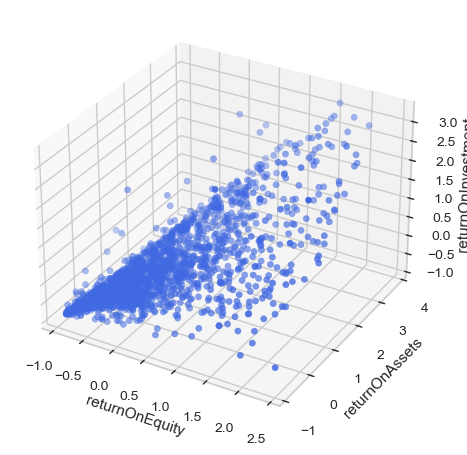

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas as pd

# Defining each scaler
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Scaling the data
X_train_minimax = min_max_scaler.fit_transform(indicators_df)
X_train_standard = std_scaler.fit_transform(indicators_df)
X_train_robust = robust_scaler.fit_transform(indicators_df)

# Convert X_train_robust back to a DataFrame to use column names and indexing
X_train_robust_df = pd.DataFrame(X_train_robust, columns=indicators_df.columns)

# Define a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the x, y, & z of our scatter plot from the scaled DataFrame
x = X_train_robust_df.iloc[:, 0]
y = X_train_robust_df.iloc[:, 1]
z = X_train_robust_df.iloc[:, 2]

# Define the axis labels using the original column names
column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# Define the markers and the color
ax.scatter(x, y, z, c='royalblue', marker='o')

# Show the plot
plt.show()


In [86]:
#scalers take data and try to normalize it. in library Sklearn
#Standard Scaler: Subtracting mean from each data ppint and dividing it by standard deviation
#Min Max Scaler: Scaling the data so that it fits in a range between 0 and 1
#Robust Scaler: Best for outliers. It uses interquartile range instead of min and max

from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler

#defining each scaler
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

#scaling the info 
X_train_minimax = min_max_scaler.fit_transform(indicators_df)
X_train_standard = std_scaler.fit_transform(indicators_df)
X_train_robust= robust_scaler.fit_transform(indicators_df)

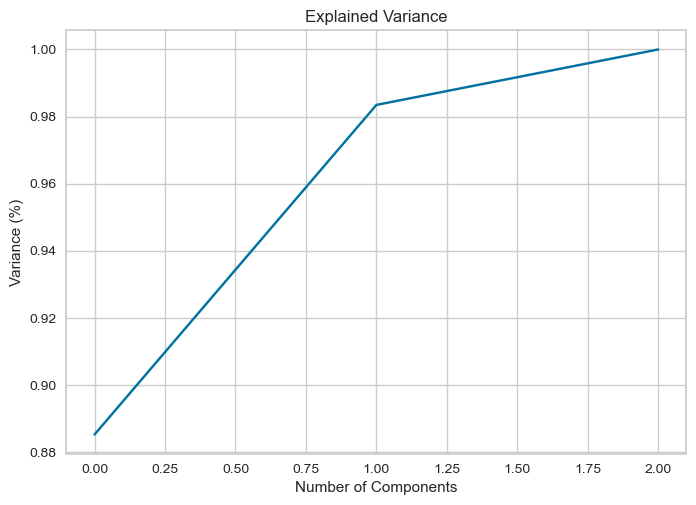

In [87]:
#Principle Component Analysis
#this is good to use with large datasets with multiple attributes it allows our model to
#run faster and have less redundant data 
#the idea behind this is to remove the attributes that dont contribute much to the overall story 
#even though if you miss some detail on your dataset there is a chance you lose 3% of all info
#it still can be described with 97% of the story which is more than enough 

from sklearn.decomposition import PCA
import numpy as np

#pass through scaled data 
pca = PCA().fit(X_train_robust)

#plot the cumalative sumation of the explained variance 
plt.figure() 
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#defining the titles and labels
plt.xlabel('Number of Components') 
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

#showing plot 
plt.show()

In [88]:
#create a PCA modified datatset
pca_dataset = PCA(n_components = 2).fit(X_train_robust).transform(X_train_robust)

#storing it in new dataframe 
pca_dataset = pd.DataFrame(data = pca_dataset, columns = ['Component 1', 'Component 2'])

pca_dataset.head()

,Component 1,Component 2
0,-0.629487,-0.200409
1,-0.522683,0.330626
2,-0.433569,0.196831
3,-0.371103,-0.281737
4,1.832524,-0.811197


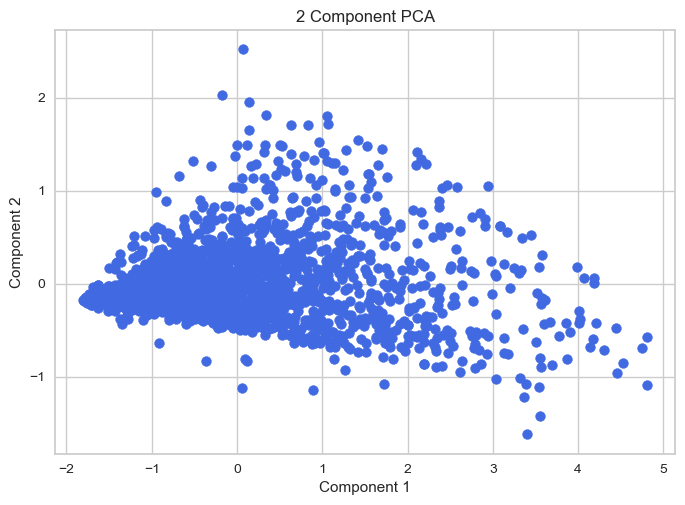

In [89]:
#plotting the figure 
plt.figure() 

#defining the labels and titles
plt.xlabel('Component 1') 
plt.ylabel('Component 2')
plt.title('2 Component PCA')


#plotting the scatter 
plt.scatter(pca_dataset['Component 1'], pca_dataset['Component 2'], c = 'royalBlue', s = 50)

In [94]:
from sklearn.cluster import KMeans
from sklearn import metrics 

# Defining result dictionary 
# Storing scores 
result_dict = {}

# Silhouette analysis can be used to study the separation distance between the resulting clusters 
# The plot displays how close each point in one cluster is to points in neighboring clusters 
# +1 = sample is far away 
# 0 = sample is close

# Defining number of iterations we want 
num_of_clusters = 10

# Run through each k 
for k in range(2, num_of_clusters + 1):  # Corrected range
    print('-'*100)
    # Defining the key for iteration
    result_dict[k] = {}
    # Create an instance of the kmeans 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    # Defining silhouette score 
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')  # Corrected spelling
    # Store the different metrics 
    result_dict[k]['silhouette score'] = sil_score
    result_dict[k]['inertia score'] = kmeans.inertia_
    result_dict[k]['model'] = kmeans 
    result_dict[k]['score'] = kmeans.score(pca_dataset) 
    # Printing the results 
    print(f"The number of clusters: {k}")  # Using f-string
    print(f"Silhouette Score: {sil_score}")  # Using f-string

----------------------------------------------------------------------------------------------------
The number of clusters: 2
Silhouette Score: 0.5526552721011729
----------------------------------------------------------------------------------------------------
The number of clusters: 3
Silhouette Score: 0.4839690222841732
----------------------------------------------------------------------------------------------------
The number of clusters: 4
Silhouette Score: 0.42342456214810403
----------------------------------------------------------------------------------------------------
The number of clusters: 5
Silhouette Score: 0.3866072290408471
----------------------------------------------------------------------------------------------------
The number of clusters: 6
Silhouette Score: 0.40488489780144704
----------------------------------------------------------------------------------------------------
The number of clusters: 7
Silhouette Score: 0.3843822433288299
--------------

In [97]:
# define a dictionary that contains all of our relevant info.
results_dict_pca = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict_pca[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict_pca[k]['silhouette_score'] = sil_score
    results_dict_pca[k]['inertia'] = kmeans.inertia_
    results_dict_pca[k]['score'] = kmeans.score
    results_dict_pca[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5526552721011729
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4839690222841732
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.42342456214810403
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.3866072290408471
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.40488489780144704
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.3843822433288299
--------------------------------------

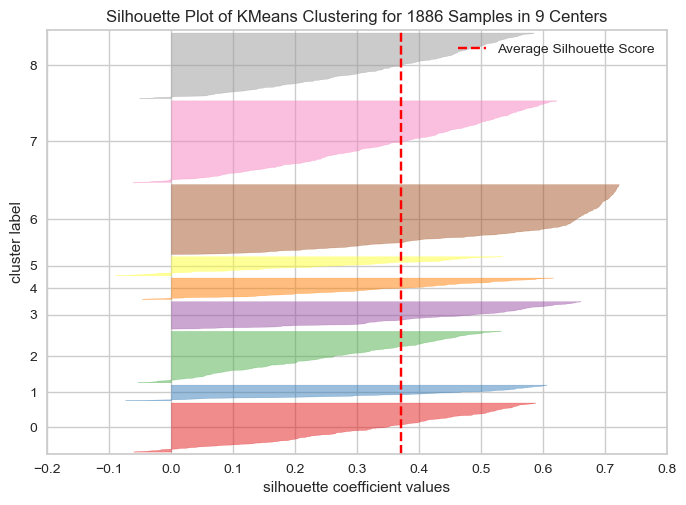

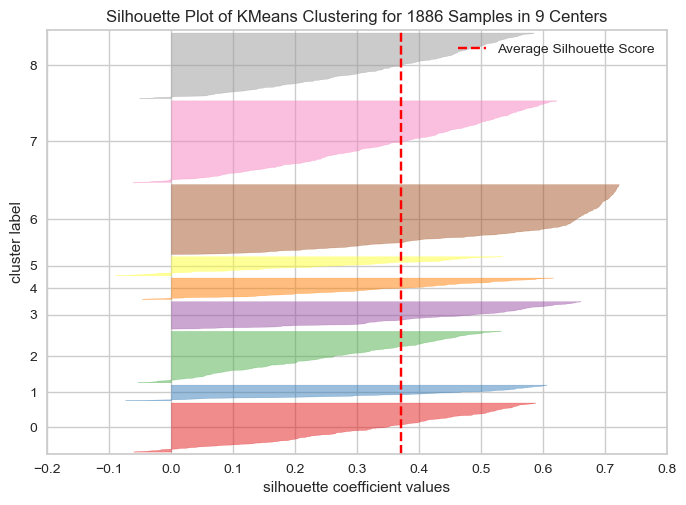

In [98]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,3]

for cluster in clusters: 
    #create an instances of the kmeans model 
    kmeans = KMeans(n_clusters=k, random_state=0)

    #pass the model through the visualizer 
    visualizer = SilhouetteVisualizer(kmeans)

    #fitting the data 
    visualizer.fit(pca_dataset)

    #show the chart
    visualizer.poof()

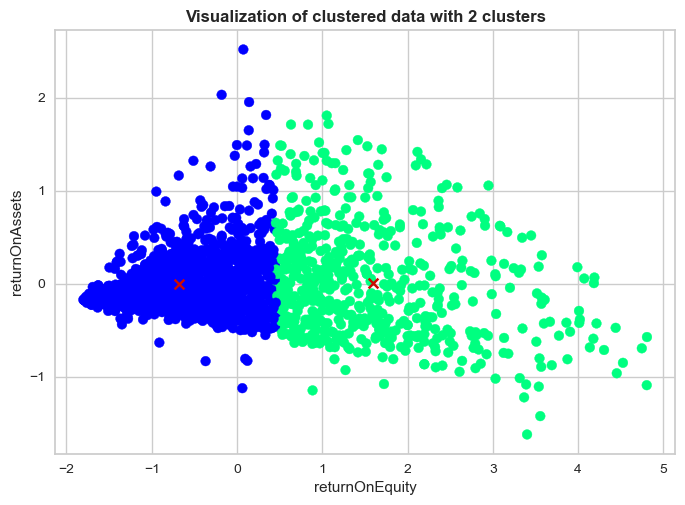

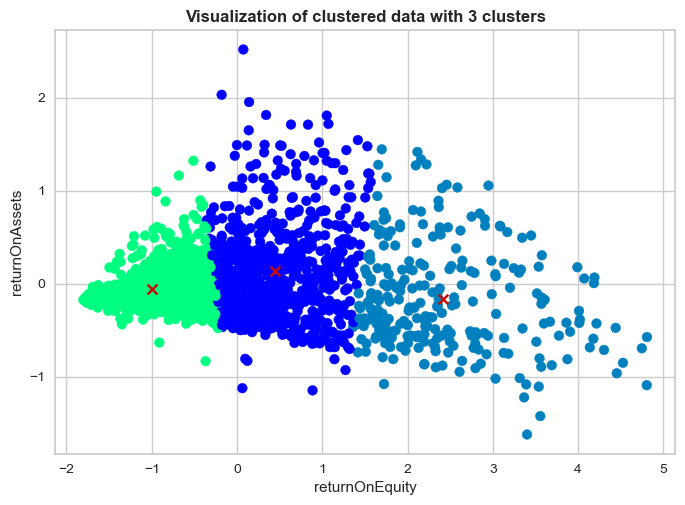

In [99]:
clusters = [2, 3]

for cluster in clusters: 
    # Create an instance of the KMeans model
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(pca_dataset)

    # Define the clusters
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    
    # Define a figure and a 2D axis
    fig, ax = plt.subplots()
    
    # Define the x and y of our scatter plot from the scaled DataFrame
    x = pca_dataset['Component 1']
    y = pca_dataset['Component 2']
    
    # Define the axis labels using the original column names
    column_names = indicators_df.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    
    # Define the markers and the color
    ax.scatter(x, y, c=kmeans.labels_.astype(float), cmap='winter', marker='o')
    ax.scatter(C1, C2, marker='x', color='r')
    
    # Define the title
    ax.set_title("Visualization of clustered data with {} clusters".format(cluster), fontweight='bold')
    
    # Show the plot
    plt.show()


In [101]:
from sklearn.cluster import KMeans

# Sample training data with 3 features
training_data = [[1.0, 2.0, 3.0],
                 [1.1, 2.1, 3.1],
                 [0.9, 1.9, 2.9],
                 [1.2, 2.2, 3.2]]

# Create and fit the KMeans model (let's assume 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(training_data)


KMeans(n_clusters=2, random_state=42)

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_data_scaled = scaler.fit_transform(training_data)
test_data_scaled = scaler.transform(test_data)


In [104]:
test_data = [[0.10, 3.10, 5.20],
             [0.60, 5.10, 2.20]]
predictions = kmeans.predict(test_data)
print(predictions)

[0 0]
